# **Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [59]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check (4).csv


In [60]:
fraud = pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [61]:
# Checking for null values
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [62]:
# Creating dummy vairables for Categorical columns
fraud=pd.get_dummies(fraud,columns=['Undergrad','Marital.Status','Urban'], drop_first=True, dtype = int)

In [63]:
# Creating new column TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [64]:
fraud

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


# **Lets assume: taxable_income <= 30000 as "Risky=0" and others are "Good=1"**

In [65]:
# Creating a new column
fraud = pd.get_dummies(fraud, columns = ["TaxInc"], drop_first = True, dtype = int)

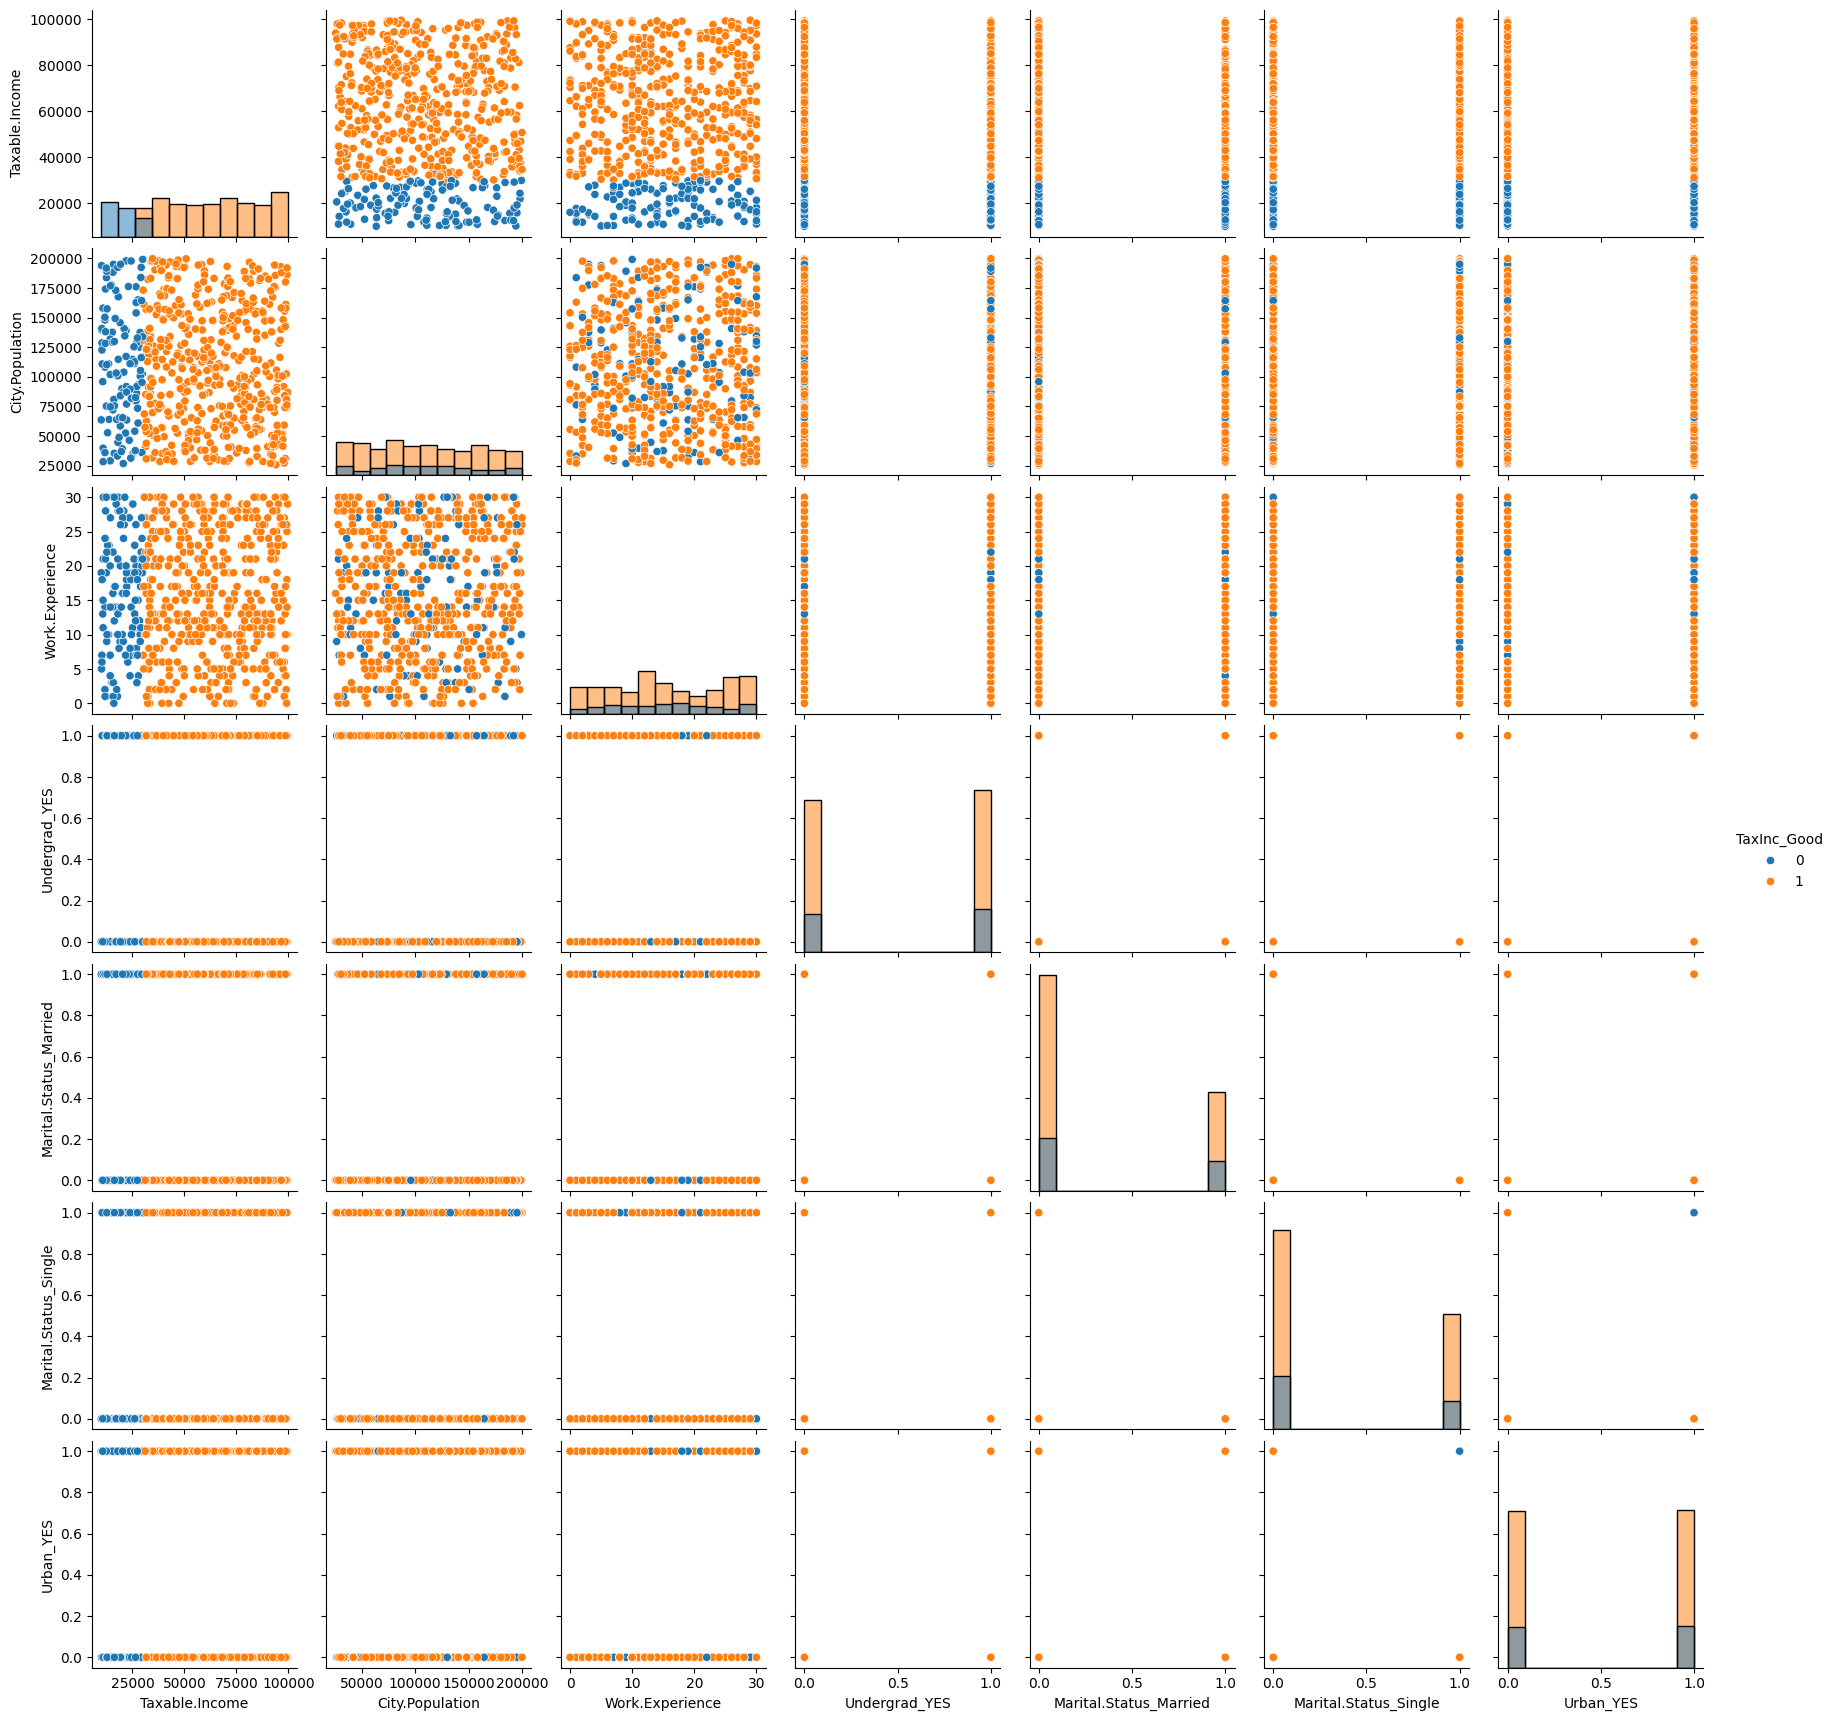

In [66]:
# Pairplot
sns.pairplot(data = fraud, hue = "TaxInc_Good", diag_kind = "hist");

In [67]:
# Defining Normalization Function
def norm_func(i):
  x = (i - i.min()) / (i.max() - i.min())
  return(x)

In [68]:
# Normaliizng  the data
fraud_norm = norm_func(fraud.iloc[:,1:])
fraud_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [70]:
# Declaring features & target
X = fraud_norm.drop(["TaxInc_Good"], axis = 1)
y = fraud_norm["TaxInc_Good"]

In [71]:
# splitting data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [73]:
# Coverting the Taxable Income variable to bucketing.
fraud_norm["income"] = "<=30000"
fraud_norm.loc[fraud["Taxable.Income"] >=30000, "income"] = "Good"
fraud_norm.loc[fraud["Taxable.Income"] <=30000, "income"] = "Risky"

In [74]:
# Dropping the Taxable income column
fraud.drop(["Taxable.Income"], axis = 1, inplace = True)

In [78]:
# Renaming the column
fraud.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [79]:
le = preprocessing.LabelEncoder()
for column_name in fraud.columns:
  if fraud[column_name].dtype == object:
    fraud[column_name] = le.fit_transform(fraud[column_name])
  else:
    pass

In [80]:
# splitting the data into features and labels
features = fraud.iloc[:,0:5]
labels = fraud.iloc[:,5]

In [81]:
# Collecting the column names
colnames = list(fraud.columns)
predictors = colnames[0:5]
target = colnames[5]

In [82]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, stratify = labels)

In [83]:
# Creating Model
model = RandomForestClassifier(n_jobs = 3, n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [84]:
model.estimators_
model.classes_

model.n_classes_

2

In [85]:
model.n_outputs_

1

In [90]:
model.oob_score_

0.5479166666666667

In [88]:
# Predictions
prediction = model.predict(x_train)

In [93]:
# Accuracy
accuracy = accuracy_score(y_train, prediction)

In [94]:
np.mean(prediction == y_train)

0.9895833333333334

In [95]:
# Confusion Matrix
confusion = confusion_matrix(y_train, prediction)

In [96]:
# Prediction
pred_test = model.predict(x_test)

In [97]:
# Accuracy
acc_test = accuracy_score(y_test, pred_test)

In [98]:
# Plotting a Decision tree present in Random forest
tree = model.estimators_[5]

In [99]:
dot_data = StringIO()
export_graphviz(tree, out_file = dot_data, filled = True, rounded = True, feature_names = predictors, class_names = target, impurity = False)

In [100]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# **Building Decision Tree Classifier Using Entropy Criteria**

In [102]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [103]:
from sklearn import tree

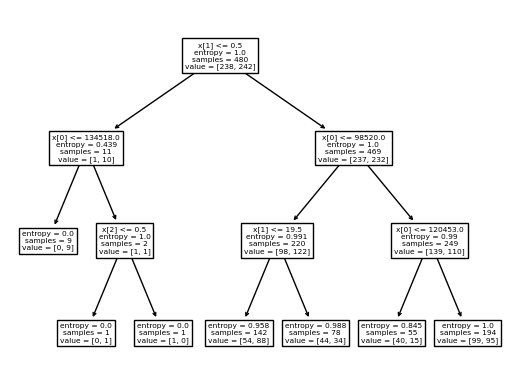

In [105]:
# Plotting the decision tree
tree.plot_tree(model);

In [106]:
colnames = list(fraud.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

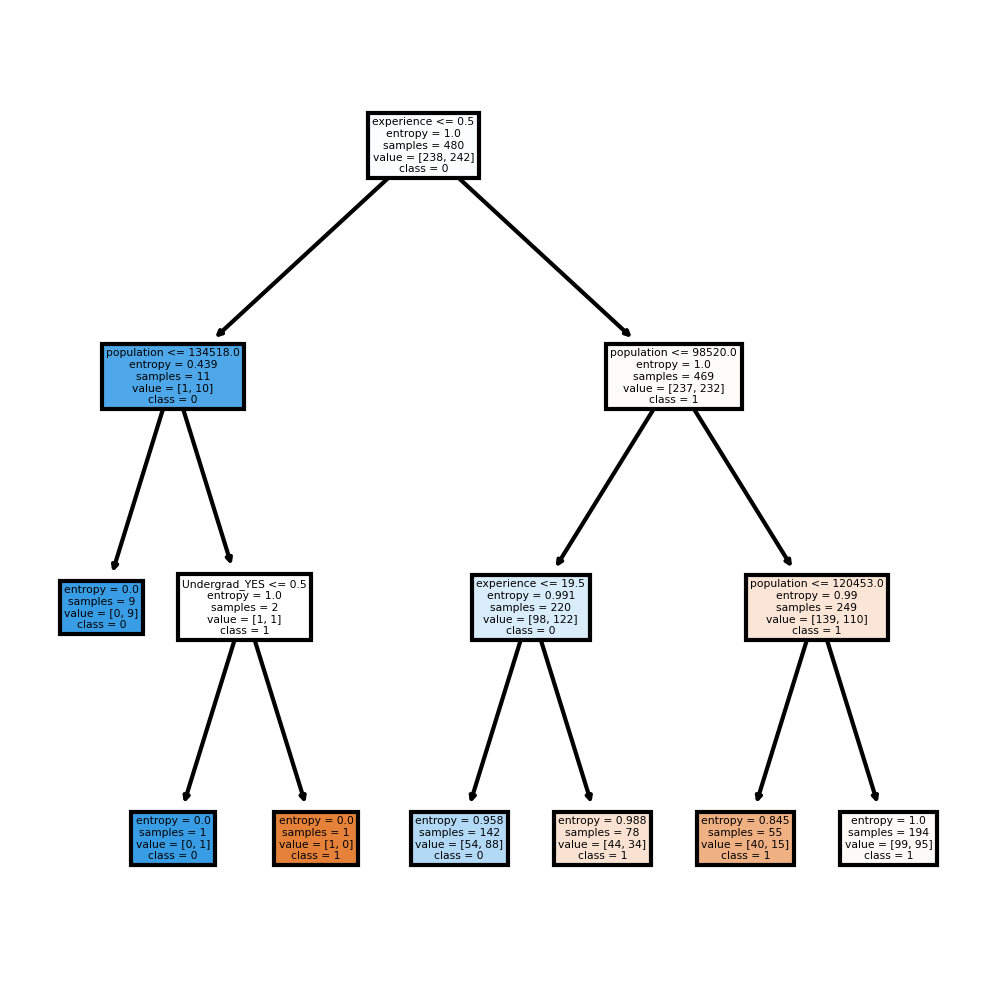

In [107]:
fn = ['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn = ["1", "0"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(model,
               feature_names = fn,
               class_names = cn,
               filled = True);

In [108]:
# Predicting on test data
preds = model.predict(x_test)  # predicting on test data set
pd.Series(preds).value_counts()  # getting the count of each category

0    91
1    29
Name: count, dtype: int64

In [109]:
preds

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [110]:
pd.crosstab(y_test, preds)

col_0,0,1
Urban_YES,,
0,45,15
1,46,14


In [111]:
# Accuracy
np.mean(preds == y_test)

0.49166666666666664

# **Building Decision tree Classifier (CART) Using Gini Criteria**

In [113]:
model_gini = DecisionTreeClassifier(criterion = "gini", max_depth = 3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [114]:
# Prediction and computing the accuracy
pred = model.predict(x_test)
np.mean(preds == y_test)

0.49166666666666664

# **Decision Tree Regression**

In [115]:
array = fraud.values
X = array[:, 0:3]
y = array[:,3]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

In [117]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [118]:
# Checking The Accuracy
model.score(X_test, y_test)

-0.8470149253731345